In [1]:
# lets load up the handwritten digit dataset
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

ds = load_digits()
X = ds.data/16.0-0.5
y = ds.target

print(X.shape)
print(y.shape)
print(np.min(X),np.max(X))
print(np.unique(y))

(1797, 64)
(1797,)
-0.5 0.5
[0 1 2 3 4 5 6 7 8 9]


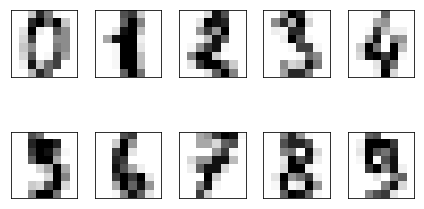

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

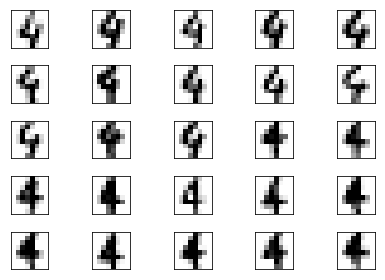

In [3]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
digit = 4
x_digits = X[y == digit]
for i in range(25):
    img = x_digits[i].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


### Helper methods

In [6]:
#!/usr/bin/env

__filename__ = "latex_doc_strings.py"
__author__ = "L.J. Brown"

import re
from IPython.display import display, Math, Latex

def extract_doc_latex(method):
    """
        looks for latex in doc strings of passes method.
        
        Format example for docstring:
        
            r\""" 
                    Foo Method Description 

                :latex: MULTI-LINE
                        LATEX EXPRESSION
                        INSERTED HERE
                        
                :param bar: (example parameter)
                :returns: (whatever) 

                * [Notes] : 
                
                    - latex code must be followed by 
                        at least one ':'(like the one 
                        leading param above)
                        
                    - doc string must be proceeded by r\""" 
            \"""
            
        :param: method with string literal doc string containing latex
        :returns: latex string literal
        
    """
    p = re.compile('(?:\:latex\:)([\s\S]+?)(?:\:)', re.MULTILINE)
    m = p.search(method.__doc__)
    return m.group(1)

def latex_doc(method):
    """
    returns rendered latex from doc string of method passed as parameter

    Format example for docstring:

            r\""" 
                    Foo Method Description 

                :latex: MULTI-LINE
                        LATEX EXPRESSION
                        INSERTED HERE

                :param bar: (example parameter)
                :returns: (whatever) 

                * [Notes] : 

                    - latex code must be followed by 
                        at least one ':'(like the one 
                        leading param above)

                    - doc string must be proceeded by r\""" 
            \"""

    :param: method with string literal doc string containing latex
    :returns: formated latex expression

    """  

    latex_string = extract_doc_latex(method)
    return display(Math(latex_string))

In [160]:
def add_bias_unit(A):
    r"""
        Add  bias units (column of 1s) to array at index 0
        
       :latex: 
       
               \text{Takes as input paramater a matrix $\mathbf{A}_{s \times n}$,} \\
               \text{ }\\
               \mathbf{A}_{ input } =
                \begin{bmatrix}
                     \text{---} & a^{(0)}    & \text{---} \\
                                & \vdots     &            \\
                     \text{---} & a^{(s-1)}  & \text{---} \\
                \end{bmatrix}
                \text{ }\\
                \text{ }\\
                \text{Where '$s$' is the number of instances being fed to the network.}\\
                \\\\
                \text{ }\\
                \text{Adds a bias column to the first column of $\mathbf{A}$ and returns the new matrix $\mathbf{A'}_{s \times n+1}$, }\\
                \text{ }\\
                \mathbf{A'}_{column \, bias} =
                \begin{bmatrix}
                     1     &  \text{---} & a^{(0)}    & \text{---} \\
                   \       &             & \vdots     &            \\
                     1     &  \text{---} & a^{(s-1)}  & \text{---} \\
                \end{bmatrix}
                
       :param A: numpy array to add bias row or column to
    """
    ones = np.ones((A.shape[0], 1))
    A_new = np.hstack((ones, A))

    return A_new

latex_doc(add_bias_unit)

<IPython.core.display.Math object>

In [153]:
def build_weight_matrix(num_input_units, num_output_units):
    r"""
        Build Weight Matrix W for layer l given number of inputs and outputs.
        Initialize weights with small random numbers.
          
       :latex: \text{ Constructs Weight Matrix $\mathbf{W}_{n \times m}^{(l)}$. } \\ \\
               \text{ }\\
               \text{ Initalizes weights using a random uniform distribution ranging from $[-1,1]$.} \\
               \text{ Number of input units, } n  \\
               \text{ Number of output units, } m \\
               \text{ }\\
               \mathbf{W}^{(l)} =
               \begin{bmatrix}
                    b_{0}   & \ldots  & b_{m-1} \\
                    w_{1,0} & \ldots  & w_{1,m-1} \\
                    \vdots  & \ldots  & \vdots \\
                    w_{n-1,0} & \ldots  & w_{n-1,m-1}
               \end{bmatrix} \\
    \text{ This matrix is used in conjustion with layer $l's$ activation matrix $\mathbf{A}^{(l)}$ }\\
    \text{ to calculate the input matrix $\mathbf{Z}^{(l)}$ to the next activation function.} \\
    \\
    \text{ }\\
    \text{ }\\
    \text{If '$s$' be the number of instances being fed to the network then,}\\
    \mathbf{Z}_{s \times m}^{(l)} = \mathbf{A}_{s \times n}^{(l)} \mathbf{W}_{n \times m}^{(l)} \\
    \text{ }\\
    \mathbf{Z} =
    \begin{bmatrix} 
            \text{---} &  z^{(0)}   & \text{---} \\
                       & \ldots     &            \\
            \text{---} &  z^{(s-1)} & \text{---} \\
    \end{bmatrix} , \;
    
    \begin{bmatrix} 
            1       & \text{---} &  a^{(0)}   & \text{---} \\
           \vdots   &            & \ldots     &            \\
            1       & \text{---} &  a^{(s-1)} & \text{---} \\
    \end{bmatrix}
    = \mathbf{A} \\
    
    \text{ }\\
    \text{Returns randomly initalized weight matrix $\mathbf{W}_{n \times m}^{(l)}.$}
    
    
      :param num_input_units: integer, number of rows in W representing the number of outputs from the previous layer (neglecting the bias terms), or the number of features for the network inputs (again neglecting the bias terms).
      :param num_output_units: integer, number of columns in W representing the number input units for the next layer (neglecting the bias terms), or the number of classes for the networks output.
    """
    W_num_elems = num_input_units * num_output_units
    
    W = np.random.uniform(-1.0, 1.0, size=W_num_elems)
    W = W.reshape(num_input_units, num_output_units) # reshape to be W
    
    return W

latex_doc(build_weight_matrix)

<IPython.core.display.Math object>

In [260]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import sys
import pandas as pd


# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class MLPBase(object):
    
    def __init__(self, n_layers, n_hidden_units=30, C=0.0, epochs=500, eta=0.001, phi="sigmoid", objective_function="quadratic", random_state=None):
        
        # [TODO]: reproduce results by initilizing W with the same weights
        np.random.seed(random_state)
        
        # number of  layers for the network
        self.n_layers_ = n_layers
        
        # number of units for each hidden layer
        self.n_hidden_units = n_hidden_units
        
        # lambda value for l2 regularization
        self.l2_C = C
        
        # maximum training epochs
        self.epochs = epochs
        
        # learning rate
        self.eta = eta
        
        # activation function
        self.phi = phi
        
        # objection function
        self.objective_function = objective_function

    def _initilize_weights(self):
        """
            Build and initilize weight matrices for network.
                
            #
            # dimensions of network components
            #
            
            *let L be the number of layers
            *let L-1 = out
            *let s be the number of instances being fed through the network at once
             (s should be the only variable parameter of a trained network)
            
            # W's - Total number of weight matrices = L: 0,1,...,L-1=out
            W_0   is ( *n_features+1* x n_hidden_units-1 )
            W_i   is ( n_hidden_units x n_hidden_units -1 ) for i = 1,..., L-2
            W_out is ( n_hidden_units x *n_classes* )
            
            # A's - total number of A's (shit propigating through network) = L: 0,1,...,L-1=out
            A_0   is ( s x n_features )
            A_i   is ( s x n_hidden_units-1 ) for i = 1, ..., L-1=out
            
            # A_b's - bias column added at index 0 - total number of A_b's = L: 0,...,L-1=out
            A_b_0 is ( s x n_features + 1 )
            A_b_i is ( s x n_hidden_units ) for i = 1, ..., L-1=out
            
            # Z's - Z = A_prime @ W - total number of Z's = L: 0,...,L-1=out
            Z_i is   ( s x n_hidden_units-1 ) for i = 0,...,L-2
            Z_out is ( s x *n_classes_* )
            
            # Y_hat_prime - phi(Z_out) - total number = 1.
            Y_hat_prime is ( s x n_classes_ )
            
            # Y_hat - each row becomes the index of the column with the max value - total number = 1.
            Y_hat is ( s x 1 )
            
        """
        # tmp***
        assert self.n_layers_ > 2
        
        #
        # Total number of weight matrices is equal to the number of layers in the network
        #  W's - Total number of weight matrices = L: 0,1,...,L-1=out
        
        #  W_0   is ( *n_features+1* x n_hidden_units-1 )
        W_0 = build_weight_matrix( self.n_features_+1 , self.n_hidden_units-1 )
        
        #  W_i   is ( n_hidden_units x n_hidden_units -1 ) for i = 1,..., L-2
        interior_Ws = [build_weight_matrix( self.n_hidden_units , self.n_hidden_units-1 ) for i in range(0,self.n_layers_-2)]
        
        #  W_out is ( n_hidden_units x *n_classes* )
        W_out = build_weight_matrix( self.n_hidden_units , self.n_classes_ )
        
        # store initilized weight matrices
        self.weight_matrices_ = [W_0] + interior_Ws + [W_out]

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y) #.values.T
        return onehot
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _linear(z):
        return z
    
    def _phi(self, z):
        if self.phi == "sigmoid":
            return self._sigmoid(z)
        if self.phi == "linear":
            return self._linear(z)
        
    def _phi_grad(self, A):
        if self.phi == "sigmoid":
            sigmoid_derivative = A * (1. - A)
            return sigmoid_derivative
        
        if self.phi == "linear":
            return a
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _objective_grad(self, y, y_hat):
        obj_grad = -2*(y - y_hat) * self._phi_grad(y_hat)
        return obj_grad
    
    @staticmethod
    def _MSE(Y_enc, Y_hat):
        cost = np.mean((Y_enc-Y_hat)**2)
        return cost
    
    @staticmethod
    def _log_likelihood(Y_enc, Y_hat):
        cost = np.sum(Y_enc * (np.log(Y_hat)))
        return cost
        
    def _cost(self,Y_hat,Y_enc,W1,W2):
        '''Get the objective function value'''
        if self.objective_function == "quadratic":
            cost = self._MSE(Y_enc, Y_hat)
        if self.objective_function == "cross_entropy":
            cost = self._log_likelihood(Y_enc, Y_hat)
        #cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

In [473]:
class MLP(MLPBase):
    
    def _feedforward(self, X):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        ----------
        """
        
        # store A's Ab's and Z's
        As = []
        Abs = []
        Zs = []
        
        # set A0 = X and begin feed forward process
        A0 = X
        As += [A0]
        
        for W in self.weight_matrices_:
            
            # add a bias column to the last A
            Ab = add_bias_unit( As[-1] )
            
            # store
            Abs += [Ab]
            
            # calculate Z
            Z = Ab @ W
            
            # store
            Zs += [Z]
            
            # compute next A by
            # applying activation function
            A_next = self._phi(Z)
            
            # store
            As += [A_next]
            
        # As should have one extra element then the other two lists
        # this is the output of our network before one hot encoding
        # Y_hat_prime = As[-1]
        
        return As, Abs, Zs
            
            
    def _get_gradient(self, As, Abs, Zs, Y_enc):
        #Compute gradient step using backpropagation.
        
        
        
        """

        # backpropagation
        grad1 = np.zeros(W1.shape)
        grad2 = np.zeros(W2.shape)
        
        # for each instance's activations 
        for (a1,a2,a3,y) in zip(A1.T,A2.T,A3.T,Y_enc.T):
            
            dJ_dz2 = self._objective_grad(y, a3)
            dJ_dz1 = dJ_dz2 @ W2 @ np.diag(self._phi_grad(a2))
                         
            dz2_dw2 = a2[np.newaxis,:]
            dz1_dw1 = a1[np.newaxis,:]
            
            # grad = VA.T 
            grad2 += dJ_dz2[:,np.newaxis]  @ dz2_dw2
            grad1 += dJ_dz1[1:,np.newaxis] @ dz1_dw1
            # don't incorporate bias term in the z1 gradient 
            # (its added in a2 from another layer)
            

        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * self.l2_C)
        grad2[:, 1:] += (W2[:, 1:] * self.l2_C)

        return grad1, grad2
        """
    
    def predict(self, X):
        #Predict class labels
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        # copy data
        X_data, y_data = X.copy(), y.copy()
        
        # setup one hot encoding
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_classes_ = Y_enc.shape[1]
        self._initilize_weights()
        
        As, Abs, Zs = self._feedforward(X_data)
        
        i = 0
        for A, Ab, W, Z in zip(As, Abs, self.weight_matrices_, Zs):
            print("A_%s shape: %s" % (i, A.shape))
            print("Ab_%s shape: %s" % (i, Ab.shape))
            print("W_%s shape: %s" % (i, W.shape))
            print("Z_%s shape: %s" % (i, Z.shape))
            i+=1
            
        #
        # Backprop
        #
        
        # calculate the error starting at the last layer and moving backward
        
        def dphi_zi(Abs, i):
            Aim1 = Abs[i-1]
            return Aim1*(1. - Aim1)
               
        error = As[-1] - Y_enc
        Vs = []
        Vn = error * As[-1] * (1. - As[-1])
        Vs += [Vn]
        
        def show_sizes(Vs, As, Ws):
            i = self.n_layers_ - len(Vs)
            Ai = Abs[i]
            Wi = Ws[i]
            Vip1 = Vs[-1]
            print("\n")
            print("Ab_%s shape: %s" % (i, Ai.shape))
            print("W_%s shape: %s" % (i, Wi.shape))
            print("V_%s shape: %s" % (i+1, Vip1.shape))
            print("dphi_z_%s shape: %s" % (i, dphi_zi(Abs, i).shape))
            
            Vi = dphi_zi(Abs, i)*(Vip1 @ Wi.T)
            print("V_%s shape: %s" % (i, Vi.shape))
            
            Aim1 = Abs[i-1]
            print("A_%s shape: %s" % (i-1, Aim1.shape))
            
            grad_ip1 = Vip1.T @ Ai
            print(grad_ip1.shape)
            
            grad_i = Vi.T @ Aim1
            print(grad_i.shape)
            
            
        Ws = self.weight_matrices_
        show_sizes(Vs, As, Ws)
        
        
        
        """
        # As has one more value then the other list, its last element is A_out
        # The activation of the output layer
        A_out = As[-1]
        dJ_dz1 = self._objective_grad(Y_enc, A_out)
        
        g_out = Abs[-1].T @ dJ_dz1
        print(self.weight_matrices_[-1].shape)
        print(g_out.shape)
        
        
        W_m1 = self.weight_matrices_[-1]
        A_m1 = Abs[-2]
        
        #dJ_dz2 = np.diag(A_m1*(1-A_m1)) * (dJ_dz1 @ W_m1.T) 
        #print(Abs[-2].T.shape)
        #print(dJ_dz2.shape)
        
        #A_m2 = As[-3]
        #g_m1 = A_m2.T @ dJ_dz2
        print(self.weight_matrices_[-2].shape)
        #print(g_m1.shape)
        print((A_m1*(1-A_m1)).shape)
        """
        
        """
        
        # W_out is the last weight matrix
        W_m1 = self.weight_matrices_[-1]
        A_m1 = Abs[-2]
        
        #dJ_dz1 = np.diag(A_m1*(1-A_m1)) * ( W_out.T @ dJ_dz2 )
        dJ_dz2 = np.diag(A_m1*(1-A_m1)) * (dJ_dz1 @ W_m1.T)
        print(dJ_dz2.shape)
        
        W_m2 = self.weight_matrices_[-2]
        #A_m2 = Abs[-2]
        A_m2 = As[-2]
        dJ_dz3 = A_m2*(1-A_m2) * (dJ_dz2 @ W_m2)
        
        print(dJ_dz3.shape)
        """
        
        #W_m3 = self.weight_matrices_[-3]
        #A_m3 = As[-3]
        #dJ_dz4 = A_m3*(1-A_m3) * (dJ_dz3 @ W_m3)
        
        #print(dJ_dz2.shape)
        #print(W_m2.T.shape)
        #t = dJ_dz2 @ W_m2
        #print(t.shape)
        #print(np.diag(A_m2*(1-A_m2)).shape)
        #t2 = A_m2*(1-A_m2)
        #print(t2.shape)
        #dJ_dz3 = np.diag(A_m2*(1-A_m2)) * (dJ_dz2 @ W_m2.T)
        
        
        """
        
        # Y_enc is the vector of true class lables
        # A_out = Y_hat i think
        
        # calculate the sensitivity of the final layer
        # lets denote this as V_fm0, V_fm1, ..., V_fm(n_layers-1)
        V_fm0 = self._objective_grad(Y_enc, A_out)
        
        # W_out is the last weight matrix
        W_out = self.weight_matrices_[-1]
        
        # We also need the activation of the last hidden layer (Abs[-1])
        A_fm1 = Abs[-1]
        W_fm0 = W_out
        V_fm1 = np.dot(V_fm0, W_fm0.T) * self._phi_grad(A_fm1)
    
        # checking
        grad_w_out = A_fm1.T @ V_fm0
        grad_b_out = np.sum(V_fm0, axis=0)
        
        #continuing until it breaks...
        A_fm2 = Abs[-2]
        W_fm1 = self.weight_matrices_[-2]
        V_fm2 = np.dot(V_fm1, W_fm1.T) #* self._phi_grad(A_fm2)
        #grad_w_fm1 = 
        """
        """
        
        # As has one more value then the other list, its last element is A_out
        # The activation of the output layer
        A_out = As[-1]
        
        # W_out is the last weight matrix
        W_out = self.weight_matrices_[-1]
        
        # first calculate 
        
        # the error vector of the output layer
        
        # A_out is the output of the network
        # Y_enc is the vector of true class lables
        
        # (n_samples x n_classlables)
        error = A_out - Y_enc
        
        # We also need the activation of the last hidden layer (Abs[-1])
        # for calculating the gradient of the objective function
        
        # vectorized backpropagation
        #V2 = -2*(Y_enc-A3)*A3*(1-A3)  # last layer sensitivity
        #V1 = A2*(1-A2)*(W2.T @ V2) # back prop the sensitivity 
        
       
        # As has one more value then the other list, its last element is A_out
        A_out = As[-1]
        
        # W_out is last matrix
        W_out = self.weight_matrices_[-1]
        
       
        # first calculate the error vector of the output layer
        # A_out is the output of the network
        # Y_enc is the vector of true class lables
        # [n_samples, n_classlables]
        sigma_out = A_out - Y_enc
        
        # [n_samples, n_hidden]
        A_h = Abs[-1]
        sigmoid_derivative_h = A_h * (1. - A_h)
        
        # [n_samples, n_classlabels] dot [n_classlabels, n_hidden]
        # -> [n_samples, n_hidden]
        sigma_h = (np.dot(sigma_out, W_out.T) * sigmoid_derivative_h)
        """
        """
        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            

        return self
        """
 

In [474]:
params = dict(n_layers=4,
              n_hidden_units=30, 
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              phi="sigmoid",
              objective_function="quadratic")

In [475]:
%%time 
nn = MLP(**params)
nn.fit(X_train, y_train, print_progress=10)
#yhat = nn.predict(X_test)
#print('Test acc:',accuracy_score(y_test,yhat))

A_0 shape: (1437, 64)
Ab_0 shape: (1437, 65)
W_0 shape: (65, 29)
Z_0 shape: (1437, 29)
A_1 shape: (1437, 29)
Ab_1 shape: (1437, 30)
W_1 shape: (30, 29)
Z_1 shape: (1437, 29)
A_2 shape: (1437, 29)
Ab_2 shape: (1437, 30)
W_2 shape: (30, 29)
Z_2 shape: (1437, 29)
A_3 shape: (1437, 29)
Ab_3 shape: (1437, 30)
W_3 shape: (30, 10)
Z_3 shape: (1437, 10)


Ab_3 shape: (1437, 30)
W_3 shape: (30, 10)
V_4 shape: (1437, 10)
dphi_z_3 shape: (1437, 30)
V_3 shape: (1437, 30)
A_2 shape: (1437, 30)
(10, 30)
(30, 30)
CPU times: user 26.7 ms, sys: 7.61 ms, total: 34.3 ms
Wall time: 9.8 ms


In [237]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30, C=0.0, epochs=500, eta=0.001, phi="sigmoid", objective_function="quadratic", random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.phi = phi
        self.objective_function = objective_function
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _linear(z):
        return z
    
    def _phi(self, z):
        if self.phi == "sigmoid":
            return self._sigmoid(z)
        if self.phi == "linear":
            return self._linear(z)
        
    def _phi_grad(self, a):
        if self.phi == "sigmoid":
            return a*(1-a)
        if self.phi == "linear":
            return a
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _objective_grad(self, y, y_hat):
        obj_grad = -2*(y - y_hat) * self._phi_grad(y_hat)
        return obj_grad
    
    @staticmethod
    def _MSE(Y_enc, Y_hat):
        cost = np.mean((Y_enc-Y_hat)**2)
        return cost
    
    @staticmethod
    def _log_likelihood(Y_enc, Y_hat):
        #term1 = -Y_enc * (np.log(Y_hat))
        #term2 = (1.0 - Y_enc) * np.log(1.0 - Y_hat)
        #cost = np.sum(term1 - term2)
        cost = np.sum(Y_enc * (np.log(Y_hat)))
        return cost
        
    def _cost(self,Y_hat,Y_enc,W1,W2):
        '''Get the objective function value'''
        if self.objective_function == "quadratic":
            cost = self._MSE(Y_enc, Y_hat)
        if self.objective_function == "cross_entropy":
            cost = self._log_likelihood(Y_enc, Y_hat)
        #cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term